In [18]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from keras.models import Model
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import  Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate , Flatten,Dense

# For Age and Gender

In [2]:
img = []
age = []
gender = []

In [3]:
main_folder = 'UTKFace'

# dataset folder name, should be the same as in your downloaded data
img_datas = os.listdir(main_folder)  # image data folders

for img_data in img_datas:
    info = img_data.split('_')
    img.append(os.path.join(img_data))
    age.append(int(info[0]))
    gender.append(int(info[1])) # 0 for male and 1 for female


In [4]:
df = pd.DataFrame({'img':img,'age':age,'gender':gender})

In [5]:
df.sample(10)

,img,age,gender
4145,24_0_0_20170109214744250.jpg.chip.jpg,24,0
12884,35_0_0_20170117130116812.jpg.chip.jpg,35,0
2253,1_1_0_20170109190803637.jpg.chip.jpg,1,1
19131,54_1_0_20170109132244248.jpg.chip.jpg,54,1
9313,28_1_2_20170116165503355.jpg.chip.jpg,28,1
431,13_1_0_20170109204108601.jpg.chip.jpg,13,1
1113,17_0_4_20170102234904707.jpg.chip.jpg,17,0
3416,22_0_3_20170117143013435.jpg.chip.jpg,22,0
18454,52_0_0_20170117160940615.jpg.chip.jpg,52,0
9801,29_1_0_20170116173132299.jpg.chip.jpg,29,1


In [6]:
age_gender_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

age_gender_generator = age_gender_datagen.flow_from_dataframe(df,directory=main_folder,x_col='img',y_col=['age','gender'],target_size=(150,150),class_mode='multi_output')

Found 23708 validated image filenames.


In [29]:
folder = 'CK+48'

emotion_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2
)

emotion_generator = emotion_datagen.flow_from_directory(folder,target_size=(150,150),batch_size=32,class_mode='categorical')

Found 981 images belonging to 7 classes.


## AGE And Gender Branch

In [35]:
# For age and  gender prediction




## Branch 1
res = ResNet50(include_top=False,weights='imagenet',input_shape=(150,150,3))
res.trainable = False

age_gender_dense = res.layers[-1].output



## Emotion Branch

## Concatination

## Output Branch

In [36]:
f = Flatten()(age_gender_dense)
x1 = Dense(128,activation='relu')(f)
o1 = Dense(1,activation='linear',name='output_age')(x1)
x2 = Dense(128,activation='relu')(f)
o2 = Dense(1,activation='sigmoid',name='output_gender')(x2)
x3 = Dense(128,activation='relu')(f)
o3 = Dense(7,activation='softmax',name='output_emotion')(x3)

## Model Build

In [37]:
model = Model(inputs=[res.input,res.input],outputs=[o1,o2,o3])

model.compile(optimizer='adam', loss={'output_age':'mae','output_gender':'binary_crossentropy','output_emotion':'categorical_crossentropy'},metrics={'output_age':'mae','output_gender':'accuracy','output_emotion':'accuracy'})


ValueError: The list of inputs passed to the model contains the same input multiple times. All inputs should only appear once.Received inputs=[<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'input_8')>, <KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'input_8')>]

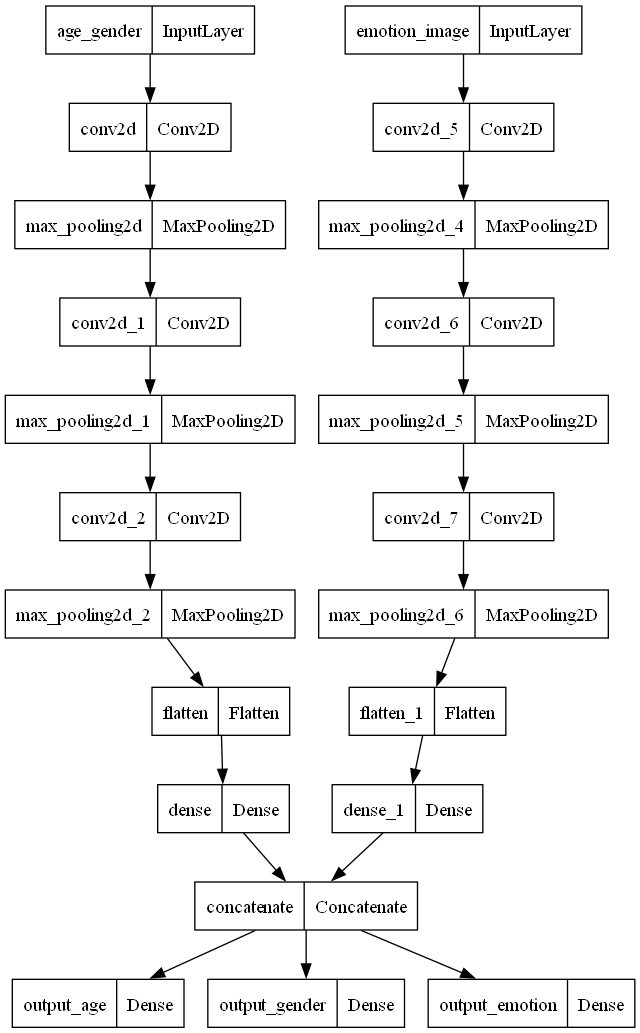

In [38]:
from keras.utils import plot_model
plot_model(model)

# Model Fit

In [17]:
model.fit(x={'age_gender':age_gender_generator,'emotion_image':emotion_generator},y={'output_age': df['age'], 'output_gender': df['gender'], 'output_emotion': emotion_generator.labels},epochs=5)

ValueError: Failed to find data adapter that can handle input: (<class 'dict'> containing {"<class 'str'>"} keys and {"<class 'keras.src.preprocessing.image.DirectoryIterator'>", "<class 'keras.src.preprocessing.image.DataFrameIterator'>"} values), (<class 'dict'> containing {"<class 'str'>"} keys and {"<class 'pandas.core.series.Series'>", "<class 'numpy.ndarray'>"} values)